In [1]:
import cv2
import librosa.display as lbdp
from PIL import Image
import pandas as pd
import numpy as np
import os
import struct
import skimage
from scipy.io import wavfile as wav
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

In [2]:
def path_class(filename):
    excerpt = data[data['slice_file_name'] == filename]

    path_name = os.path.join('UrbanSound8K/audio', 'fold'+str(excerpt.fold.values[0]), filename)
    return path_name, excerpt['class'].values[0]

In [3]:
def wav_plotter(full_path, class_label):
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    print('number of channels: ',wav_sample.shape[1])
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    print('class: ',class_label)

    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample)
    plt.show()
    return ipd.Audio(full_path)

UrbanSound8K/audio\fold2\4911-3-0-0.wav
sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  0.20931972789115647  second
number of samples:  9231
class:  dog_bark


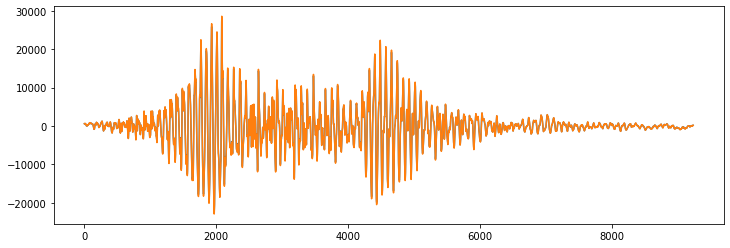

In [4]:
data = pd.read_csv("C:/Users/Ilyes/Desktop/UrbanSound8K.csv")
pd.set_option('display.max_columns', None)
base_url = "C:/Users/Ilyes/Desktop/"
appended = []
for i in range(1, 11):
    appended.append(data[data.fold == i]['class'].value_counts())

class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold" + str(x) for x in range(1, 11)]
path, label = path_class("4911-3-0-0.wav")
print(path)
wav_plotter(base_url + path, label)

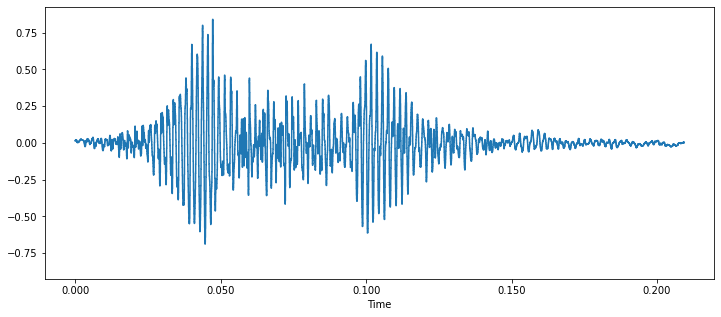

Number of crosses: 294


In [5]:
# Extract the audio data (x) and the sample rate (sr).


x, sr = librosa.load(base_url + path)

# Plot the sample.
plt.figure(figsize=(12, 5))
lbdp.waveshow(x, sr=sr)
plt.show()


n_crossings = librosa.zero_crossings(x, pad=False)
print(f'Number of crosses: {sum(n_crossings)}')

In [6]:
centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

print(f'Centroids Shape: {centroids.shape}')
print(f'First 3 centroids: {centroids[:3]}')

Centroids Shape: (10,)
First 3 centroids: [1483.67114264 1246.31337429 1254.38559931]


C:\Users\Ilyes\AppData\Local\Temp\ipykernel_12748\2460199297.py:1: FutureWarning: Pass y=[0.01363175 0.01884937 0.0164081  ... 0.00522872 0.00758309 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


MFFCs shape: (20, 10)
First mffcs: [-240.50046 -153.03334 -117.05297 -115.33924 -128.99522]


C:\Users\Ilyes\AppData\Local\Temp\ipykernel_12748\3131613867.py:1: FutureWarning: Pass y=[0.01363175 0.01884937 0.0164081  ... 0.00522872 0.00758309 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


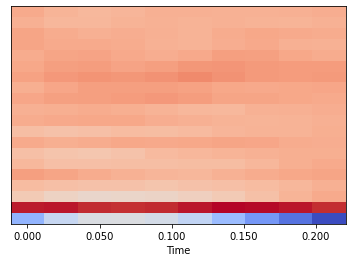

In [7]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(f'MFFCs shape: {mfccs.shape}')
print(f'First mffcs: {mfccs[0, :5]}')

# We can even display an spectogram of the mfccs.
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

128


C:\Users\Ilyes\AppData\Local\Temp\ipykernel_12748\3474175357.py:1: FutureWarning: Pass y=[0.01363175 0.01884937 0.0164081  ... 0.00522872 0.00758309 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(x, sr=sr)


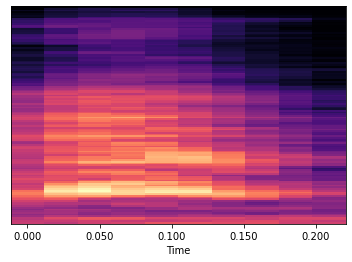

In [13]:
melspectrogram = librosa.feature.melspectrogram(x, sr=sr)


# We can even display an spectogram of the mfccs.
S_dB = librosa.power_to_db(melspectrogram, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, x_axis='time')
print(len(S_dB))


In [ ]:

base_url = "C:/Users/Ilyes/Desktop/UrbanSound8K/audio/fold"
save_url = "C:/Users/Ilyes/Desktop/mfccs/fold"
i = 1

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


while(i != 11):
    for file_name in os.listdir(base_url + str(i)):
        filename, file_extension = os.path.splitext(file_name)
        if(os.path.exists(save_url + str(i) + "/" + filename + ".png")):  
            continue
        if file_name == ".DS_Store":
            continue
        x, sr = librosa.load(base_url + str(i) + "/" + file_name)
        
        fig = plt.Figure()
        canvas = FigureCanvas(fig)
        ax = fig.add_subplot(111)
        mfccs = librosa.feature.mfcc(x, sr=sr)
        p = librosa.display.specshow(librosa.amplitude_to_db(mfccs, ref=np.max), ax=ax, y_axis='log', x_axis='time')
        
        fig.savefig(save_url + str(i) + "/" + filename + ".png")

    i += 1

    






C:\Users\Ilyes\AppData\Local\Temp\ipykernel_12748\716704346.py:20: FutureWarning: Pass y=[-0.03806284 -0.01980223  0.01911597 ...  0.02540329  0.02504704
  0.01378652] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)
C:\Users\Ilyes\AppData\Local\Temp\ipykernel_12748\716704346.py:20: FutureWarning: Pass y=[ 0.00565461  0.01137413  0.01387449 ... -0.00148977  0.01151228
  0.01901995] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)
C:\Users\Ilyes\AppData\Local\Temp\ipykernel_12748\716704346.py:20: FutureWarning: Pass y=[ 0.01647689  0.02791149  0.02834367 ... -0.00408207 -0.00494618
 -0.00633416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)
C:\Users\Ilyes\AppData\Local\Temp\ipykernel_12748\716704346.py:20: FutureWarning: 

In [72]:
def get_label_name(filename):
    try:
        id_class = filename.split("-",4)[1]
        switcher = {
            "0" : "air_conditioner",
            "1" : "car_horn",
            "2" : "children_playing",
            "3" : "dog_bark",
            "4" : "drilling",
            "5" : "engine_idling",
            "6" : "gun_shot",
            "7" : "jackhammer",
            "8" :  "siren",
            "9" : "street_music",
        }
        return switcher.get(id_class, "nothing")
    
    except Exception:
        return None
    
def get_label(filename):
    try:
        id_class = filename.split("-",4)[1]
        return id_class
    except Exception:
        return None

def load_data(data_dir):
    X = []
    Y = []
    for img in os.listdir(data_dir):
            img_arr = cv2.imread(os.path.join(data_dir, img), cv2.IMREAD_COLOR)
            resized_arr = cv2.resize(img_arr, (500, 500)) 
            X.append(resized_arr)    
            Y.append(get_label(img))
    return np.array(X), Y
    
save_url = "C:/Users/Ilyes/Desktop/melspectrogram/fold1/"
X, Y = load_data(save_url)


MemoryError: Unable to allocate 2.44 GiB for an array with shape (873, 500, 500, 3) and data type float32

0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = siren
9 = street_music